# <center> FUNDAMENTOS DE APRENDIZAJE AUTOMÁTICO <br> Y RECONOCIMIENTO DE PATRONES</center>
## <center> 1er parcial, 2019</center>           

La duración del parcial es de 3 horas. El parcial consta de 3 ejercicios, cuya suma total es de 120 puntos. El estudiante podrá obtener como máximo 100 de los 120 puntos posibles. El parcial es sin material y no está permitido acceder a Internet. Ante cualquier duda comuníquese con los docentes. 

* [Ejercicio 1 - Teoría de la generalización](#Ejercicio1) (20 puntos)
* [Ejercicio 2 - Regresión logística](#Ejercicio2) (20 puntos)
* [Ejercicio 3 - Clasificación de dígitos](#Ejercicio3) (80 puntos)

In [86]:
# Se importan las biblotecas que se van a utilizar
import numpy as np
from matplotlib import pyplot as plt
import h5py # es el formato en el que están almacenados los dígitos

from IPython.display import Image

plt.rcParams['figure.figsize'] = (10.0, 10.0) # tamaño de las figuras por defecto
# el inline sirve para que las figuras se muestren dentro del notebook
%matplotlib inline

<a id="Ejercicio1"></a>
# Ejercicio 1: Teoría de la generalización

Considere el conjunto de hipótesis $\mathcal{H}$ dado por los rayos positivos o negativos, es decir,
todas las hipótesis en R que devuelven +1 a la derecha de un punto $\textit{a}$ y -1 a la izquierda
(rayos positivos), o que devuelven -1 a la derecha y +1 a la izquierda (rayos negativos), como se muestra en la figura.

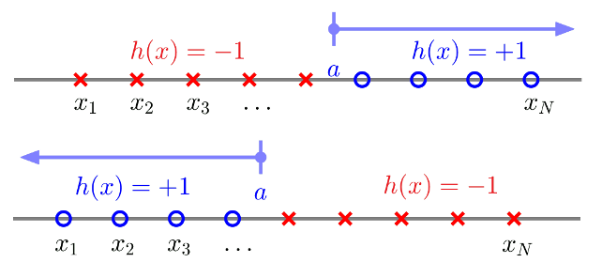

In [2]:
Image(filename="figuras/rayos.png")

<a id="Ej1-Parte-a"></a>
### Ejercicio 1 - parte a)
Calcule la función de crecimiento $m_{\mathcal{H}}(N)$ de este conjunto de hipótesis.

**Respuesta:**   

Para calcular la función de crecimiento, se toman los N puntos y se ordenan de forma tal que se generen la mayor cantidad de dicotomías. En este caso, esto sucede si ninguno de los puntos coinciden. Sea este el caso. Los N puntos parten la recta real en $N+1$ secciones. Las posibles dicotomías va a estar dada por las secciones en donde caiga $a$, por lo tanto hay $N+1$ posibles dicotomías. 
<center> $m_{\mathcal{H}}(N) = N+1$ </center>

<a id="Ej1-Parte-b"></a>
### Ejercicio 1 - parte b)
Calcule el menor punto de quiebre $k$ y la dimensión de Vapnik-Chervonenkis $d_{\textrm{VC}}$ para la función de crecimiento calculada en la parte anterior.

**Respuesta:**   

El punto de quiebre k es el tamaño del data set tal que no puede ser particionado por $\mathcal{H}$, es decir, que $m_{\mathcal{H}}(k) < 2^k$. 

|  N  |  $2^N$  |            N+1             |
| --- |  -----  |  ------------------------  | 
|  1  |    2    |            3               | 
|  2  |    4    |            3               | 
|  3  |    8    |            4               | 

Por lo que $k=2$ es un punto de quiebre.
Por otro lado, la dimesión Vapnik-CHervonenkis $d_{vc}$ es el mayor valor de N para el cual $m_{\mathcal{H}}(N) = 2^N$, entonces $k=d_{vc}+1$ $\rightarrow$ $d_{vc}=1$

<a id="Ej1-Parte-c"></a>
### Ejercicio 1 - parte c)
Escriba la cota polinómica para la función de crecimiento de la primera parte explícitamente como: i) un polinomio en $N$ (con todos los términos) y ii) como el monomio de mayor orden, usando el valor de $d_{\textrm{VC}}$ de la parte anterior. Puede ser útil el comando de LaTeX <i>binom</i> que permite generar: $\binom{N}{i}$.

**Respuesta:**   

En el teórico se busca acotar la función de crecimiento por $B(N,k)$. El **lema de Sauer** dice:
<center> $B(N,k) \leq \sum_{i=0}^{k-1}\binom{N}{i}$ </center>

Luego, el **teorema 2.4** acota la función de crecimiento:
<center> $m_{\mathcal{H}}(N) \leq \sum_{i=0}^{k-1} \binom{N}{i}$ </center>
para todo N. La parte derecha de la desigualdad es un polinomio en N de grado k-1. 

i) Utilizando el resultado del teorema, como $k=1$ queda:
<center> $m_{\mathcal{H}}(N) \leq N+1$ </center>
donde se da la igualdad

ii) Si existe un punto de quiebre k, la funcion se puede acotar por $N^{d_{vc}}+1$: 
<center> $m_{\mathcal{H}}(N) \leq N + 1$ </center>

<a id="Ej1-Parte-e"></a>
### Ejercicio 1 - parte d)
Explique cuál es la importancia de que exista una cota polinómica para la función de crecimiento $m_{\mathcal{H}}(N)$.

**Respuesta:**   

La **cota de generalización**, derivada de la desigualdad de Hoeffding, se define:

<center> $E_{out}(g) \leq E_{in}(g) + \sqrt{ \frac{1}{2N} ln \frac{2M}{\delta}}$ </center>
donde M es el número de hipótesis.

Lo que se busca es sustituír M por la función de crecimiento. 
La importancia de que la cota de la función de crecimiento sea polinómica, es que si no lo fuera, es decir, no existiera un punto de quiebre k, entonces la función sería igual a $2^
N$ para todo N, entonces el término aditivo en el lado derecho de la igualdad (la cota de error de generalización) no se iría a cero sin importar cuantos training examples N se tuvieran. Por otro lado, si la función de crecimiento se pudiera acotar por *cualquier* polinómio, entonces cuando $N \rightarrow \infty$ el error de generalización se iría a cero.Esto quiere decir que generalizaría bien dado una suficiente cantidad de training examples. 



<a id="Ej1-Parte-e"></a>
### Ejercicio 1 - parte e)
Considere la desigualdad de Vapnik-Chervonenkis 
$$ P[|E_{\textrm{in}}(g) - E_{\textrm{out}}(g)| > \epsilon]  \leq 4 m_{\mathcal{H}}(2N) e^{-\frac{1}{8} \epsilon^2 N} \quad \quad \epsilon > 0 $$
Dado un nivel de tolerancia $\delta = 4 m_{\mathcal{H}}(2N) e^{-\frac{1}{8} \epsilon^2 N}$, escriba una cota para el error fuera de muestra $E_{\textrm{out}}(g)$ que se cumpla con probabilidad $1-\delta$, de la forma $E_{\textrm{out}}(g) \leq E_{\textrm{in}}(g) + \Omega(N, \mathcal{H}, \delta)$, dando explícitamente la expresión para $\Omega$.

**Respuesta:**   


$$ P[|E_{\textrm{in}}(g) - E_{\textrm{out}}(g)| > \epsilon]  \leq 4 m_{\mathcal{H}}(2N) e^{-\frac{1}{8} \epsilon^2 N} \quad \quad \epsilon > 0 $$ 

es lo mismo que 

$$ P[|E_{\textrm{in}}(g) - E_{\textrm{out}}(g)| \leq \epsilon] >  1 -4 m_{\mathcal{H}}(2N) e^{-\frac{1}{8} \epsilon^2 N} \quad \quad \epsilon > 0 $$

que es lo mismo que decir que con probabilida de al menos $1 - 4 m_{\mathcal{H}}(2N) e^{-\frac{1}{8} \epsilon^2 N}$ se cumple que 

$$ |E_{out}(g) - E_{in}(g)| \leq \epsilon$$

Por lo tanto 

$$E_{out}(g) \leq E_{in}(g) + \epsilon$$

luego, como:
$$ \delta = 4 m_{\mathcal{H}}(2N) e^{-\frac{1}{8} \epsilon^2 N}$$

epsilon (y Omega)quedan:
$$ \Omega(N, \mathcal{H}, \delta) = \epsilon = \sqrt{\frac{8}{N}ln(\frac{4 m_{{\mathcal{H}}}(2N)}{\delta})}$$

<a id="Ejercicio2"></a>
# Ejercicio 2: Regresión logística

En un problema de dos clases, el modelo de regresión logística asume que la probabilidad a posteriori de pertenencia a la clase positiva puede ser escrita de la siguiente forma:

$$
P(y=1|\mathbf{x}_n;\mathbf{w})= \theta \left( \mathbf{w}^T\mathbf{x}_n \right)= \frac{1}{1+\exp\left(-\left(\mathbf{w}^T\mathbf{x}_n\right)\right)}
$$

donde $\mathbf{x_n}=\left( 1, x_{n1},x_{n2},...,x_{nd}\right)$ es el n-ésimo vector de característcas expresado en coordenadas homogéneas y $d$ es el número de característcas.  

<a id="Ej2-Parte-a"></a>
### Ejercicio 2 - parte a) 
Mostrar que $P(y=y_n|\mathbf{x}_n;\mathbf{w}) = \frac{1}{1+\exp\left(-\left(y_n \mathbf{w}^T\mathbf{x}_n\right)\right)} $

**Respuesta:** 

Se quiere aprender la funcion objetivo dada por la probabilidad: $ f(x) = P (y = 1 | x)$
La información es generada por:
$$ 
P(y|x) = \begin{cases}
         f(x) && si & y=+1 \\
         1-f(x) &&  si & y =-1
         \end{cases}
$$

La función que se desea estimar es *f* mediante una hipótesis *h* de la siguiente forma: $$h(x) = \theta(w^Tx_n)$$
Entonces, utilianzo la propiedad $(*)$ $1-\theta(s)=\theta(-s)$:

$$ 
P(y_n|x_n) = \begin{cases}
                 h(x_n) && si & y_n=+1 \\
                 1-h(x_n) &&  si & y_n=-1
             \end{cases}
           = \begin{cases}
                 \theta(w^Tx_n) && si & y_n=+1 \\
                 1-\theta(w^Tx_n) &&  si & y_n=-1
             \end{cases}
           \stackrel{*}{=} \begin{cases}
                 \theta(w^Tx_n) && si & y_n=+1 \\
                 \theta(-w^Tx_n) &&  si & y_n=-1
             \end{cases}
           = \begin{cases}
                 \theta(y_nw^Tx_n) && si & y_n=+1 \\
                 \theta(y_nw^Tx_n) &&  si & y_n=-1           
             \end{cases}
$$

Entonces:
$$
P(y_n|x_n) = \theta(y_nw^Tx_n) 
$$

<a id="Ej2-Parte-b"></a>
### Ejercicio 2 - parte b) 
Mostrar que la log-verosimilitud $l(\mathbf{y}| \mathbf{X};\mathbf{w})$ en el modelo logístico se escribe como $$
 l(\mathbf{y}| \mathbf{X};\mathbf{w}) = \sum_{n=1}^{N} \log \left( \theta(y_n \mathbf{w}^T\mathbf{x}_n) \right)
$$

donde $\mathbf{X}$ es una matriz de $N \times (d+1)$ e $\mathbf{y}$ es un vector que contiene las $N$ etiquetas. 

**Respuesta:**   

Como todos los puntos son generados de forma independiente, la probabilidad de obtener los $y_n$ a partir de los $x_n$ es el producto.
$$
l(y|X;w) = ln(\prod_{n=1}^N P(y|x)) 
         \stackrel{1}{=} \sum_{n=1}^N ln(P(y|x))
         \stackrel{2}{=} \sum_{n=1}^N ln(\theta(y_nw^Tx_n))
$$

Donde $(1)$ es por prop de los logaritmos y $(2)$ por el resultado de la parte anterior.


 <a id="Ej2-Parte-c"></a>
### Ejercicio 2 - parte c) 
Mostrar que encontrar el $\mathbf{w}$ que maximiza la log-verosimilitud es equivalente a encontrar el $\mathbf{w}$ que minimiza la función de costo: 

$$
E_{in}(\mathbf{w}) = \frac{1}{N}\sum_{n=1}^N \log \left( 1 + \exp \left( -y_n \mathbf{w}^T\mathbf{x}_n \right) \right)
$$

**Respuesta:**   

Definiendo la función de costo como (entropia cruzada):
$$
E_{in}(w) = -\frac{1}{N}l(y|X;w) \tag{1}
$$
Queda:
$$
E_{in}(w) = \frac{1}{N}\sum_{n=1}^N ln(\frac{1}{\theta(y_nw^Tx_n)}) \tag{3}
$$
Y como:
$$
\theta(y_nw^Tx_n) = \frac{e^{y_nw^Tx_n}}{1 + e^{y_nw^Tx_n}} \tag{3}
                  = \frac{1}{1 + e^{-y_nw^Tx_n}}
$$

Sustituyendo $3$ en $2$ se obtiene la función de costo buscada.
Luego, utilizando $1$ se ve que maximizar la log verosimilitud es minimizar el costo

<a id="Ejercicio3"></a>
# Ejercicio 3: Clasificación de dígitos

En este ejercicio se trabajará con la base USPS de dígitos disponible en [kaggle](https://www.kaggle.com/bistaumanga/usps-dataset) que se utilizó en el práctico. El objetivo será separar el dígito uno de los restantes.

El ejercicio consta de 14 partes. Las partes indicadas con color rojo son puntos de control que pueden ser realizadas aún cuando alguna de las partes anteriores no haya sido completada. Para realizar dichas partes sin haber completado alguna anterior puede que sea necesario ejecutar todas las celdas anteriores.
* [Extracción de características](#Extraccion)
    * [Parte 1](#Parte1)
* [División del conjunto en entrenamiento y test](#DivisionEntrenamientoTest)
    * [<font color='red'> Parte 2 </font>](#Parte2)
* [Normalización de características](#Normalizacion)
    * [<font color='red'> Parte 3 </font>](#Parte3)
* [Transformación de características](#TransformacionCaracteristicas)
    * [<font color='red'> Parte 4 </font>](#Parte4)
* [Regresión lineal para clasificación](#RegresionLineal) 
    * [<font color='red'> Parte 5 </font>](#Parte5),  [<font color='red'> Parte 6 </font>](#Parte6), [Parte 7](#Parte7), [Parte 8](#Parte8), [Parte 9](#Parte9)
* [Validación cruzada](#ValidacionCruzada)
    * [<font color='red'> Parte 10 </font>](#Parte10) y [Parte 11](#Parte11)
* [Evaluación con conjunto de test](#ConjuntoTest)
    * [Parte 12](#Parte12)
* [Preguntas finales](#Preguntas)
    * [<font color='red'> Parte 13 </font>](#Parte13) y [<font color='red'> Parte 14 </font>](#Parte14)

 A continuación se cargan los datos y se muestra una imagen de cada dígito.

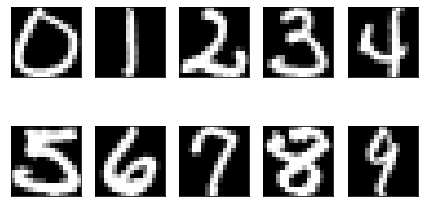

In [87]:
path='usps/usps.h5'

with h5py.File(path, 'r') as hf:
        train = hf.get('train')
        X_train = train.get('data')[:]
        y_train = train.get('target')[:]
        test = hf.get('test')
        X_test = test.get('data')[:]
        y_test = test.get('target')[:]

# Se combinan todos los datos en un solo conjunto
X = np.vstack((X_train,X_test))
y = np.hstack((y_train,y_test)).T
del X_train, y_train, X_test, y_test

# Se deberían ver 2 × 5 subfiguras con una imagen  
# representativa de cada dígito

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X[y == i][0].reshape(16, 16)
    ax[i].imshow(img, cmap='gray')
    ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()


<a id="Extraccion"></a>
## Extracción de características

En vez de trabajar con los valores de los píxeles como características se generará una representación de los dígitos mucho más compacta.

<a id="Parte1"></a>
### Ejercicio 3 - parte 1

##### Completar el código de la función `caracterizar_digitos(digitos)`, la misma genera una representación de los dígitos utilizando solamente dos características. 

$$
\begin{align}
intensidad &= \frac{1}{256}\sum_{m=0}^{15}\sum_{n=0}^{15}I(m,n)  \\
simetria &= 1 - \frac{1}{256}\sum_{m=0}^{15}\sum_{n=0}^{15} \frac{ \vert I(m,n)- I(m,15 - n) \vert + \vert I(m,n)- I(15-m, n)\vert}{2} \\
         &= \frac{\text{simetria horizontal}+\text{simetria vertical}}{2}
\end{align}
$$

yo:
Puedo escribir la simetría como:
$$
\begin{align}
simetria &= 1 - \frac{1}{256}\sum_{m=0}^{15}\sum_{n=0}^{15} \frac{|I(m,n)-I(m,15-n)|}{2} + \frac{|I(m,n)-I(15-m,n)|}{2} \\
          &= 1 - \frac{1}{256}\sum_{m=0}^{15}\sum_{n=0}^{15} \frac{|I(m,n)-I(m,15-n)|}{2} - \frac{1}{256}\sum_{m=0}^{15}\sum_{n=0}^{15} \frac{|I(m,n)-I(15-m,n)|}{2} \\
          &= \frac{1}{2} + \frac{1}{2} - \frac{1}{2}\frac{1}{256}\sum_{m=0}^{15}\sum_{n=0}^{15} |I(m,n)-I(m,15-n)| - \frac{1}{2}\frac{1}{256}\sum_{m=0}^{15}\sum_{n=0}^{15} |I(m,n)-I(15-m,n)| \\
          &= \frac{1}{2}[1 - \frac{1}{256}\sum_{m=0}^{15}\sum_{n=0}^{15} |I(m,n)-I(m,15-n)| + 1 - \frac{1}{256}\sum_{m=0}^{15}\sum_{n=0}^{15} |I(m,n)-I(15-m,n)|] \\
          &= \frac{1}{2}(\text{simetria horizontal} + \text{simetria vertical})
\end{align}
$$
Donde 

$$
\text{simetria vertical} = 1 - \frac{1}{256}\sum_{m=0}^{15}\sum_{n=0}^{15} |I(m,n)-I(m,15-n)|
$$
$$
\text{simetria horizontal} = 1 - \frac{1}{256}\sum_{m=0}^{15}\sum_{n=0}^{15} |I(m,n)-I(15-m,n)|
$$

In [88]:
def caracterizar_digitos(digitos):
    '''
    Genera las características que se utilizarán para clasificar los dígitos
    Entrada:
        digitos: matriz de Nx256 que contiene N dígitos
    Salida:
        features: matriz de Nx2 con las característcas calculadas. En principio se 
                  sugiere calcular la intensidad promedio y una medida de simetría, 
                  pero podría calcularse alguna otra medida.
    '''
    N = digitos.shape[0]
    features = np.zeros((N,2))  # vector que almacena las características generadas
    
    #######################################################
    ######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
    #######################################################
    
    # se calcula la intensidad promedio
    intensidad = (1/256)*np.sum(digitos, axis=1)
    
    # se calcula la simetría. 
    # Previo al cálculo de las simetrías puede ser útil np.reshape() 
    # para transformar el vector de entrada de tamaño Nx256 en uno de Nx16x16
    # Para el cálculo de las simetrías puede ser útil np.fliplr() y np.flipud()
    
    digits_reshaped = np.reshape(digitos,(N,16,16))

    
    simetria = np.zeros_like(intensidad)

    for i, dig_i in enumerate(digits_reshaped):
        simetria_ = np.sum(np.abs(dig_i - np.fliplr(dig_i))) + \
                    np.sum(np.abs(dig_i - np.flipud(dig_i)))
        
        simetria[i] = 1 - (1/256)*simetria_/2
        
    features[:,0] = intensidad
    features[:,1] = simetria
    
    #######################################################
    ######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
    #######################################################
    
    return features

Se calculan las características para los dígitos y se las guarda.

In [89]:
features_estudiante = caracterizar_digitos(X)
print('Se calcularon las características de %d dígitos' % features_estudiante.shape[0] )

# Se guardan las características calculadas por el estudiante
np.save('caracteristicas_estudiante', features_estudiante)

Se calcularon las características de 9298 dígitos


A continuación se comparan las características calculadas con las características precalculadas por los docentes. Si la implementación de `caracterizar_digitos()` es correcta la ejecución de la celda muestra el valor True. De aquí en más se trabajará con las características calculadas por los docentes.

In [90]:
# Se levantan las características calculadas por los docentes 
features = np.load('caracteristicas_docentes.npy')
np.allclose(features_estudiante, features)

True

<a id="DivisionEntrenamientoTest"></a>
## División entre conjunto de entrenamiento y test

Al conjunto de datos disponibles se lo dividirá en un conjunto de entrenamiento y uno de test. 

<a id="Parte2"></a>
### Ejercicio 3 - parte 2

Completar la siguiente celda de forma que se seleccionen aleatoriamente 300 dígitos para el conjunto de entrenamiento. Los demás dígitos formarán parte del conjunto de test. 

In [91]:
N_random = 300      # se van a elegir aleatoriamente 300 puntos para entrenamiento
N = X.shape[0]     # número de puntos totales
np.random.seed(42) # 42    
 
# Se dividen aleatoriamente los índices de cada conjunto (entrenamiento y test)
indices = np.random.permutation(N)
indices_train = indices[:N_random]
indices_test =  indices[N_random:]

#######################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################   

# Se seleccionan las características que se utilizarán en el conjunto de entrenamiento
features_train = features[indices_train]

# Se seleccionan las correspondientes etiquetas para el conjunto de entrenamiento
y_train = y[indices_train]

# Se seleccionan las características que se utilizarán en el conjunto de test
features_test = features[indices_test]

# Se seleccionan las etiquetas que se utilizarán en el conjunto de test
y_test = y[indices_test]

#######################################################
######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################


<a id="Normalizacion"></a>
## Normalización de características

Se plantea realizar una normalización de las características del conjunto de entrenamiento. Esto quiere decir que para cada una de las características se deberá encontrar un factor de escala y una traslación de forma tal que el mínimo valor que toma esa característica sea -1 y el máximo valor +1. La transformación es de la forma:

$$
f_n= \alpha (f + \beta)
$$

<a id="Parte3"></a>
### Ejercicio 3 - parte 3

Normalizar los puntos del conjunto de entrenamiento

In [92]:
# traslación de la primera característica
f_max = np.max(features_train[:,0])
f_min = np.min(features_train[:,0])

beta1 = -(f_min + f_max)/2

# factor de re-escalado de la primera característica
alpha1 = 2/(f_max - f_min)

# traslación de la segunda característica
f_max = np.max(features_train[:,1])
f_min = np.min(features_train[:,1])

beta2 = -(f_min + f_max)/2

# factor de re-escalado de la segunda característica
alpha2 = 2/(f_max - f_min)


# caracteristicas de entrenamiento normalizadas
features_train_n_estudiante = np.zeros_like(features_train)
features_train_n_estudiante[:,0] = alpha1*(features_train[:,0]+ beta1) 
features_train_n_estudiante[:,1] = alpha2*(features_train[:,1]+ beta2)

La siguiente celda verifica que las características fueron correctamente normalizadas.

In [93]:
min0, min1 = np.min(features_train_n_estudiante, axis=0)
max0, max1 = np.max(features_train_n_estudiante, axis=0)
print('El rango de la característica cero es: [%.02f, %.02f]' % (min0, max0))
print('El rango de la característica uno es: [%.02f, %.02f]' % (min1, max1))

El rango de la característica cero es: [-1.00, 1.00]
El rango de la característica uno es: [-1.00, 1.00]


A continuación se guardan las características calculadas y se levantan las características normalizadas precalculadas por los docentes. Si ambas coinciden la ejecución de la celda muestra el valor True. De aquí en más se trabajará con las precalculadas por los docentes.

In [94]:
# Se guardan las características normalizadas calculadas por el estudiante
np.save('caracteristicas_train_normalizadas_estudiante', features_train_n_estudiante)

# Se guardan las etiquetas de entrenamiento calculadas por el estudiante
np.save('y_train_estudiante', y_train)

In [95]:
# Se levantan las características normalizadas precalculadas por los docentes
features_train_n = np.load('caracteristicas_train_normalizadas_docentes.npy')

# Se levantan las etiquetas de entrenamiento precalculadas por los docentes
y_train = np.load('y_train_docentes.npy')

np.allclose(features_train_n_estudiante, features_train_n)

True

## Generar problema de dos clases

La función `generar_problema_dos_clases()` es la encargada de generar, a partir de las características y etiquetas originales, un conjunto de datos listos para ser utilizados en un problema de clasificación de dos clases. 

In [96]:
def generar_problema_dos_clases(X, y, clase1, clase2):
    '''
    Entrada: 
        X: matriz de dígitos
        y: etiquetas asociadas a los dígitos
        clase1: lista con los dígitos a los que se le asignará la clase 1
        clase2: lista con los dígitos a los que se le asignará la clase -1
    Salida:
        Xb: matriz que contiene únicamente las características de los dígitos 
            clase1 y clase 2
        yb: etiquetas asignadas a los dígitos clase1 y clase2 (1 o -1)
    '''
    
    indicesClase1 = [ etiqueta in clase1 for etiqueta in y ] 
    indicesClase2 = [ etiqueta in clase2 for etiqueta in y ]

    clase1 = X[indicesClase1]
    clase2 = X[indicesClase2]

    Xb = np.vstack((clase1,clase2))
    yb = np.ones(len(Xb),dtype=int)
    yb[len(clase1):] *= -1

    return Xb, yb


Para este problema una de las clases será el dígito 1 (se le asignará la etiqueta 1) mientras que la otra clase estará compuesta por los restantes dígitos (se les asignará la etiqueta -1).

In [97]:
clase1 = [1]
clase2 = [0,2,3,4,5,6,7,8,9]
Xb_train, yb_train = generar_problema_dos_clases(features_train_n, y_train, clase1, clase2)

# Se verifica que las dimensiones sean correctas
assert ( np.sum( [y in clase1 for y in y_train] ) + np.sum( [y in clase2 for y in y_train] )  == len(yb_train) ), \
        'La dimensión del vector de etiquetas de entrenamiento generado no es correcta'

<a id="TransformacionCaracteristicas"></a>
## Transformación de características

Se propone realizar una transformación de las características a un espacio de mayor dimensión mediante los $\textbf{Polinomios de Legendre}.$

Los polinomios de Legendre son una familia de polinomios ortogonales muy utilizados en problemas de regresión. La transformación en polinomios de Legendre se define como: 

$$
    (x_1, x_2) \rightarrow (1, L_1(x_1), L_1(x_2), L_2(x_1), L_1(x_1)L_1(x_2), L_2(x_2), L_3(x_1), L_2(x_1)L_1(x_2),...)
$$

donde en cada característica se reemplaza $x_i^k$ por $L_k(x_i)$ siendo $L_k(\cdot)$ el polinomio de Legendre de orden $k$.

Los primeros dos polinomios son $L_0(x)=1$ y $L_1(x)=x$. Los polinomios de mayor orden se definen mediante la recursión:

$$
L_k(x)=\frac{2k-1}{k}xL_{k-1}(x)-\frac{k-1}{k}L_{k-2}(x)
$$

<a id="Parte4"></a>
### Ejercicio 3 - parte 4

Implementar la función `evaluar_Legendre()` 

In [98]:
def evaluar_Legendre(x_, k):
    '''
    Evalúa el polinomio de Legendre de orden k en los puntos del vector x_
    Entrada:
        x_: vector que contiene los puntos a ser evaluados
        k:  orden del polinomio de Legendre a evaluar en los valores de x_
    Salida:
        Lk: vector que contiene los valores de los polinomios de Legendre de orden k evaluados en x_
    '''
    
    #######################################################
    ######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########  
    #######################################################   
    ## Implementacion usando una funcion
    #      c = np.zeros(k+1)
    #      c[k] = 1
    #      Lk = np.polynomial.legendre.legval(x_, c)
    
    # Implementacion usando recursividad
    
    Lk = np.ones_like(x_)
    
    if k == 1:
        Lk = x_
    elif k > 1:
        Lk = (2*k-1)/k*x_*evaluar_Legendre(x_, k-1) - (k-1)/k*evaluar_Legendre(x_, k-2)
    
    
    #######################################################
    ######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########  
    #######################################################   

    
    return Lk

Obs: La funcion hace:
 - Si $$x\_ = (x_1,x_2,...,x_n)$$ el polinomio que devuelve es $$L_k = (L_k(x_1),L_k(x_2),...,L_k(x_n))$$

La función `transformacion_polinomica()` realiza una transformación polinómica de orden $n$. Permite elegir el tipo de transformación y el orden de la misma. Dicha función ya ha sido implementada.

In [99]:
def transformacion_polinomica(features, tipo_transformacion='Legendre', orden_transformacion = 8):
    '''
    features: matriz de tamaño de Nx2 que contiene las características a transformar
    tipo_transformacion:  tipo de transformación a aplicar.
                         'Canonica': Realiza una transformación polinómica canónica
                         'Legendre': Realiza una transformación de Legendre
    orden_transformacion: orden de la transformación a aplicar
    '''
    
    # Número de puntos
    N = features.shape[0]
    
    # Lista que contiene la cantidad de dimensiones para cada orden. 
    # Ej: para orden 0 la dimensión es 1. Una transformación de orden 1 agrega dos dimensiones más,
    # una de orden 2 agrega 3 más, etc.
    dimensiones_por_orden = [k+1 for k in range(orden_transformacion+1)]
    
    # se transforma el tipo de datos de lista a numpy.array
    dimensiones_por_orden = np.asarray(dimensiones_por_orden)
    
    # La dimensión total de la transformación es igual a la suma de dimensiones agregadas en cada orden
    D = dimensiones_por_orden.sum()
    
    # Se inicializa la matriz de características en el espacio transformado a cero
    features_T = np.zeros((N,D))
    
    d=0
    for k in range(orden_transformacion + 1):
        
        # cantidad de dimensiones que aporta el orden x 
        dim_orden_k = dimensiones_por_orden[k]
       
        for l in range(dim_orden_k):
            
            if tipo == 'Legendre': 
                features_T[:,d] = evaluar_Legendre(features[:,0], l)*evaluar_Legendre(features[:,1], (k-l))
            elif tipo == 'Canonica':
                features_T[:,d]=features[:,0]**l * features[:,1]**(k-l)
            d=d+1
    
    return features_T

Para resolver el problema se decide realizar una **transformación polinómica** de **orden 8** de las características. 

In [100]:
tipo = 'Legendre'
orden = 8
Zb_train_estudiante  = transformacion_polinomica(Xb_train, tipo_transformacion=tipo, orden_transformacion=orden)
print('El número de características en el espacio transformado es %d' % Zb_train_estudiante.shape[1])

# Se guardan las características caculadas por los estudiantes
np.save('Zb_train_legendre_estudiante', Zb_train_estudiante)

El número de características en el espacio transformado es 45


In [101]:
# Se levantan las características caculadas por los docentes
Zb_train = np.load('Zb_train_legendre_docentes.npy')
    
# Se comparan las características calculadas por los docentes con las calculadas por el estudiante
np.allclose(Zb_train, Zb_train_estudiante)

True

<a id="RegresionLineal"></a>
## Regresión lineal para clasificación

Se abordará este problema como uno de regresión lineal con $\textit{valores objetivos} \pm 1$. Los parámetros óptimos $\mathbf{w}_{\textrm{reg}}$ del modelo lineal se obtendrán mediante la siguiente ecuación:   

$\mathbf{w}_{\textrm{reg}} = (\mathbf{Z}^{\intercal}\mathbf{Z} + \lambda \mathbf{I})^{-1} \mathbf{Z}^{\intercal} \mathbf{y}$

<a id="Parte5"></a>
### Ejercicio 3 - parte 5

Indique cuál es la optimización que da lugar a la solución planteada para $\mathbf{w}_{reg}$. En particular comente el rol que cumple $\lambda$ en dicha optimización.

**Respuesta:**   

Se restringe el presupuesto de valores que pueden tomar los pesos. En vez de minimizar el el error in-sample ($E_{in}(w)$), se minimiza 
$$
E_{aug}(h, \lambda, \Omega) = E_{in}(w) + \frac{\lambda}{N}\Omega(w)
$$ 
Donde $\Omega$, por ejemplo en el caso de regresión Ridge es $w^Tw$. \
$\lambda$ es una constante positiva a nuestra disposición. Cuanto mayor es, mayor es el peso que tiene el término de penalización en la minimización del error, es decir, más restrictivo se será en cuanto a los valores que pueden tomar los pesos.




<a id="Parte6"></a>
### Ejercicio 3 - parte 6

El método `regresion_Ridge()` obtiene el vector $\mathbf{w}_{\textrm{reg}}$ a partir de la solución encontrada en la parte anterior. Implementarlo.

In [102]:
def regresion_Ridge(Z, y, reg = 0, regularizar_bias=False):
    
    '''
    Implementa la solución cerrada de la regresión de Ridge. En esta variante se
    permite elegir si se desea regularizar el bias (coeficiente w_0) o no.
    Entrada:
        Z: matríz de tamaño Nx(d+1) 
        y: valores objetivo
        reg: coeficiente que multiplica el término de regularización
        regularizar_bias: variable booleana que indica si se regulariza el término
                        de bias o no.
    Salida:
        w_reg: parámetros encontrados mediante la regularización de Ridge
    '''

    # Si no se regulariza el coeficiente w_0 se pone el elemento [0,0]
    # de la matríz identidad a cero      
    reg_matrix = np.identity(Z.shape[1])
    if not regularizar_bias:
        reg_matrix[0,0]=0
    
    ########################################################################
    ############# EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO  ###################
    ########################################################################
    
    w_reg = np.linalg.inv(Z.T @ Z + reg*reg_matrix) @ Z.T @ y
     
    ########################################################################
    ############# TERMINA ESPACIO PARA COMPLETAR CÓDIGO  ###################
    ########################################################################
    
    return w_reg

## Regresión lineal sin regularización

<a id="Parte7"></a>
### Ejercicio 3 - parte 7

Encontrar el vector de pesos y el error de clasificación con el conjunto de entrenamiento sin utilizar ningún tipo de regularización. Se entiende por error de clasificación al porcentaje de muestras mal clasificadas.

In [103]:
########################################################################
############# EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO  ###################
########################################################################

w_ls_0 = regresion_Ridge(Zb_train, yb_train)

# Error de clasificación con el conjunto de entrenamiento
y_predicted = np.where(Zb_train @ w_ls_0 > 0, 1, -1)

# creo vector con 1 en donde y_predicted e yb_train son diferentes
vec_dif = np.where(y_predicted==yb_train, 0, 1)

# sumo el total de entradas diferentes
nro_result_dif = np.sum(vec_dif)

total_entradas = yb_train.shape[0]

error_ls_0 = nro_result_dif*100/total_entradas

########################################################################
############# TERMINA ESPACIO PARA COMPLETAR CÓDIGO  ###################
########################################################################
print('Error de clasificación utilizando regresión lineal (espacio transformado) = %f' % error_ls_0 )

Error de clasificación utilizando regresión lineal (espacio transformado) = 0.333333


## Visualización de las fronteras de decisión

El método `visualizar_frontera_decision()` muestra la frontera de decisión encontrada. 

In [104]:
def visualizar_frontera_decision(X, y, w, tipo, orden):
    '''
    Entrada:
        X: matriz de Nx2 que contiene los puntos en el espacio original
        y: etiquetas de los puntos
        w: vector del modelo lineal en el espacio transormado que contiene los parámetros encontrados
        orden: orden de la transformación polinómica
    '''

    # Se construye una grilla de 50x50 en el dominio de los datos
    xs = np.linspace( X[:,0].min(), X[:,0].max())
    ys = np.linspace( X[:,1].min(), X[:,1].max())

    XX, YY = np.meshgrid( xs, ys ) 
    ZZ = np.zeros_like(XX)
    
    # se transforman los puntos de la grilla
    pts_grilla = np.vstack( (XX.ravel(),YY.ravel()) ).T
    Z = transformacion_polinomica( pts_grilla, tipo_transformacion = tipo, orden_transformacion=orden)
    
    # los puntos transformados son proyectados utilizando el w
    ZZ = Z @ w
    ZZ = ZZ.reshape(XX.shape)#
    
    # se grafica la frontera de decisión, es decir, la línea de nivel 0  
    plt.figure(figsize=(7,7))
    plt.contour(XX, YY, ZZ, [0], colors='k', linewidths=0.7)
    # a los efectos de la visualización se multiplica por menos uno el signo para que el colormap 
    # le asigne color azul a los unos y rojo a los demás dígitos.
    plt.contourf(XX, YY, -np.sign(ZZ), alpha=0.25, cmap='bwr')
    plt.scatter(X[:,0][y==1],X[:,1][y==1], s=40, color='b', marker='o', 
                label='etiqueta -1')
    plt.scatter(X[:,0][y==-1],X[:,1][y==-1], s=40, color='r', marker='x', 
                label='etiqueta 1')
    plt.title('Frontera de decision obtenida mediante transformación no lineal de datos')
    plt.tight_layout()

Ejecutar la siguiente celda y corroborar visualmente que la frontera de decisión mostrada es coherente con el resultado obtenido con el conjunto de entrenamiento. 

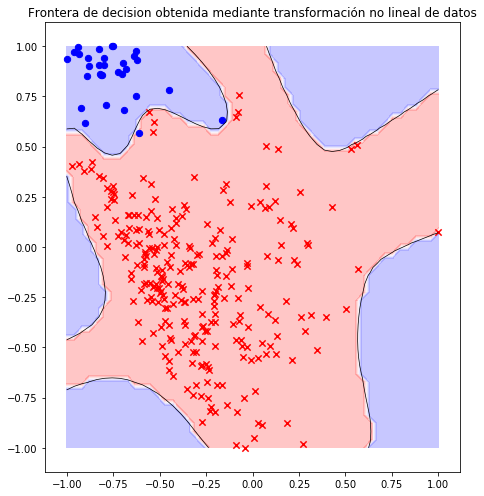

In [105]:
# Se grafica el resultado del entrenamiento
visualizar_frontera_decision(Xb_train,yb_train, w_ls_0, tipo, orden)

## Regresión lineal con regularización

<a id="Parte8"></a>
### Ejercicio 3 - parte 8

Encontrar el vector de pesos $\mathbf{w}_{ls\_2}$ y el correspondiente error de clasificación utilizando el conjunto de entrenamiento cuando el factor de regularización es $\lambda=2$

In [109]:
########################################################################
############# EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO  ###################
########################################################################

reg = 2
w_ls_2 = regresion_Ridge(Zb_train, yb_train, reg)

# Error de clasificación con el conjunto de entrenamiento
y_predicted_2 = np.where(Zb_train @ w_ls_2 > 0, 1, -1)

# creo vector con 1 en donde y_predicted e yb_train son diferentes
vec_dif_2 = np.where(y_predicted_2==yb_train, 0, 1)

# sumo el total de entradas diferentes
nro_result_dif_2 = np.sum(vec_dif_2)

total_entradas = yb_train.shape[0]

error_ls_2 = nro_result_dif_2*100/total_entradas

########################################################################
############# TERMINA ESPACIO PARA COMPLETAR CÓDIGO  ###################
########################################################################
print('Error de clasificación utilizando regresión lineal (espacio transformado) = %f' % error_ls_2)

Error de clasificación utilizando regresión lineal (espacio transformado) = 1.000000


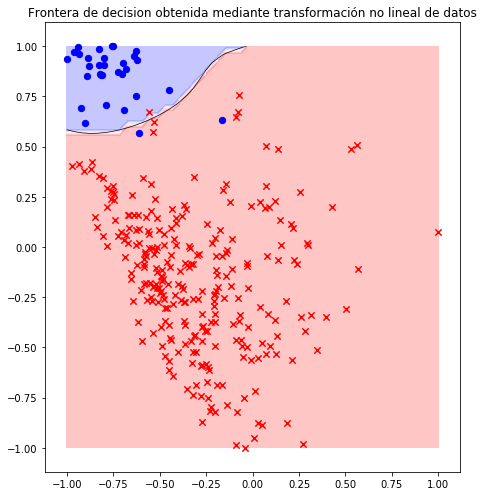

In [107]:
# Se grafica el resultado del entrenamiento  
visualizar_frontera_decision(Xb_train, yb_train, w_ls_2, tipo, orden)

<a id="Parte9"></a>
### Ejercicio 3 - parte 9

Compare los puntos de funcionamiento obtenidos con factores de regularización $\lambda=0$ y $\lambda=2$ en términos del grado de ajuste a los datos.

**Respuesta:**
Sin regularización, la frontera de decisión es considerablemente mas sofisticada, ajustandose más a los datos de lo necesario para particionar el conjunto.

<a id="ValidacionCruzada"></a>
## Validación cruzada

En esta parte se buscará encontrar el factor de regularización óptimo $\lambda^*$ mediante el procedimiento de validación cruzada. La estimación de $E_{cv}$ se realizará utilizando la fórmula cerrada:

$$
E_{cv}(\lambda)=\frac{1}{N}\sum_{n=1}^N \left( \frac {\hat{y}_n - y_n} {1 - H_{nn}(\lambda)}  \right)^2
$$

donde $H(\lambda)=Z(Z^TZ + \lambda I)^{-1}Z^T \;$ y $\;\hat{y}_n = H y_n$

<a id="Parte10"></a>
### Ejercicio 3 - parte 10

Usando el método `validacion_cruzada_analitica()` encontrar el factor de regularización óptimo $\lambda^*$ y el error de validación cruzada correspondiente a dicho valor óptimo $E_{cv}(\lambda^*$). 

In [26]:
def validacion_cruzada_analitica(Z, y, lambdas, regularizar_bias=False):
    
    '''
    Método que calcula el vector E_cv para los valores de lambda indicados en
    el vector lambdas
    Entrada:
        Z: matriz de tamaño Nx(d+1) que contiene en cada fila un vector de 
           características expresado en coordenadas homogéneas
        y: vector de etiquetas
        lambdas: vector que contiene los factores de regularización a considerar
    Salida:
        E_cv: vector que contiene en cada componente el resultado de aplicar 
              validación cruzada con el correspondiente factor de regularización 
    '''
    
    # Se define el vector que guardará los resultados de la validación cruzada
    E_cv = np.empty(len(lambdas))
    
    reg_matrix = np.identity(Z.shape[1])
    if not regularizar_bias:
        reg_matrix[0,0]=0
          
    for l, reg in enumerate(lambdas):
        H = Z @ np.linalg.inv( Z.T @  Z  + reg*reg_matrix ) @ Z.T
        y_pred = H @ y
        E_cv[l] = np.mean( ( (y_pred - y)/(1 - np.diag(H)) )**2 )
    
    return E_cv
            
    

El lambda óptimo es: 2.400000 con un error en validación curzada de 0.043996


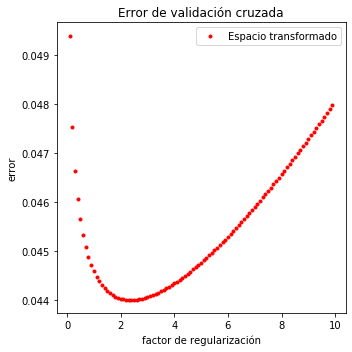

In [27]:
# Se genera la grilla con los valores de regularización a probar
max_lambda = 10; step=0.1
lambdas = np.arange(step, max_lambda, step)

########################################################################
############# EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO  ###################
########################################################################

E_cv = validacion_cruzada_analitica(Zb_train, yb_train, lambdas)

lambda_optimo = lambdas[np.argmin(E_cv)]

E_cv_optimo = E_cv[np.argmin(E_cv)]

########################################################################
############# TERMINA ESPACIO PARA COMPLETAR CÓDIGO  ###################
########################################################################

print('El lambda óptimo es: %f con un error en validación curzada de %f' % (lambda_optimo, E_cv_optimo))

plt.figure(figsize=(5,5))
#plt.plot(lambdas,  E_cv_ls, 'b.', label='Espacio original')
plt.plot(lambdas,  E_cv,'r.', label='Espacio transformado')
plt.xlabel('factor de regularización')
plt.ylabel('error')
plt.title('Error de validación cruzada')
plt.legend()
plt.tight_layout()

###  Modelo con el factor de regularización óptimo

<a id="Parte11"></a>
### Ejercicio 3 - parte 11

Estime el vector de pesos con el factor de regularización óptimo y el error de clasificación con el conjunto de entrenamiento

In [28]:
########################################################################
############# EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO  ###################
########################################################################

# Se estima el vector de pesos óptimo
w_ls_reg = regresion_Ridge(Zb_train, yb_train, lambda_optimo)

# Se estima el error con el conjunto de entrenamiento
y_predicted_reg = np.where(Zb_train @ w_ls_reg > 0, 1, -1)

# creo vector con 1 en donde y_predicted e yb_train son diferentes
vec_dif_reg = np.where(y_predicted_reg==yb_train, 0, 1)

# sumo el total de entradas diferentes
nro_result_dif_reg = np.sum(vec_dif_reg)

total_entradas = yb_train.shape[0]

error_ls_reg = nro_result_dif_reg*100/total_entradas

########################################################################
############# TERMINA ESPACIO PARA COMPLETAR CÓDIGO  ###################
########################################################################
print('Error de clasificación utilizando regresión lineal (espacio transformado) = %f' % error_ls_reg )

Error de clasificación utilizando regresión lineal (espacio transformado) = 1.000000


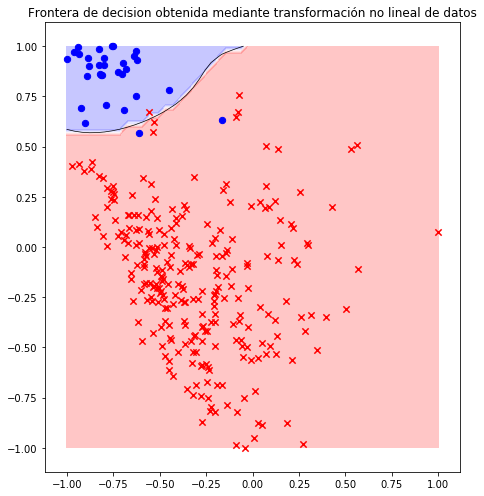

In [29]:
visualizar_frontera_decision(Xb_train, yb_train, w_ls_reg, tipo, orden)

<a id="ConjuntoTest"></a>
## Error con el conjunto de test

Se estimará el error $E_{out}$ a partir del error de clasificación con el conjunto de test $E_{test}(\mathbf{w}_{reg}(\lambda))$.

<a id="Parte12"></a>
### Ejercicio 3 - parte 12

Completar la siguiente celda para estimar el error de clasificación $E_{out}$ con el conjunto de test.

El error de clasificación con el conjunto de test es 1.489220


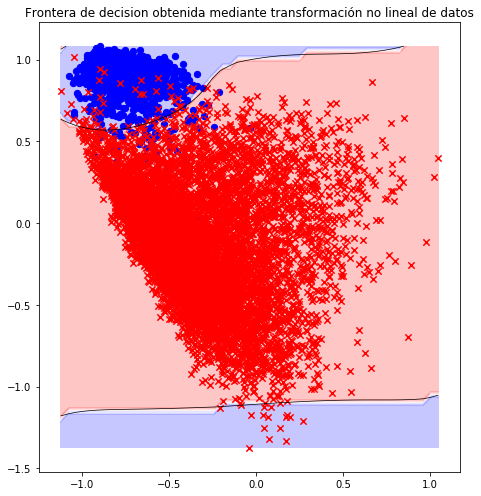

In [30]:
########################################################################
############# EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO  ###################
########################################################################

# se normalizan las características del conjunto de test
features_test_n = np.zeros_like(features_test)
features_test_n[:,0] = alpha1*(features_test[:,0]+ beta1) 
features_test_n[:,1] = alpha2*(features_test[:,1]+ beta2)

# se ajustan las etiquetas para el problema de dos clases que se quiere resolver
clase1 = [1]
clase2 = [0,2,3,4,5,6,7,8,9]
Xb_test, yb_test = generar_problema_dos_clases(features_test_n, y_test, clase1, clase2)

# se realiza la transformación no lineal de características
tipo = 'Legendre'
orden = 8
Zb_test  = transformacion_polinomica(Xb_test, tipo_transformacion=tipo, orden_transformacion=orden)



yb_pred_test = np.where(Zb_test @ w_ls_reg > 0, 1, -1)

# creo vector con 1 en donde y_predicted e yb_train son diferentes
vec_dif_test = np.where(yb_pred_test==yb_test, 0, 1)

# sumo el total de entradas diferentes
nro_result_dif_test = np.sum(vec_dif_test)

total_entradas_test = yb_test.shape[0]

E_out = nro_result_dif_test*100/total_entradas_test

print('El error de clasificación con el conjunto de test es %f' % E_out)
########################################################################
############# TERMINA ESPACIO PARA COMPLETAR CÓDIGO  ###################
########################################################################

# Se grafica el resultado con el conjunto de test  
visualizar_frontera_decision(Xb_test, yb_test, w_ls_reg, tipo, orden)

<a id="Preguntas"></a>
### Preguntas 

<a id="Parte13"></a>
### Ejercicio 3 - parte 13

El orden de la transformación utilizado parece excesivo teniendo en cuenta la cantidad de datos de entrenamiento. Fundamente esta afirmación.

**Respuesta:**

### <font color='red'>Pensar porque podria ser <font>

<a id="Parte14"></a>
### Ejercicio 3 - parte 14

Con la normalización realizada hay varios puntos del conjunto de test que quedan fuera del rango [-1,1]. Se podrían ajustar los parámetros de normalización para evitarlo. Argumente por qué esto no es una buena idea. 

**Respuesta:**   

Porque si se utiliza otra normalización para los datos de test se estaría haciendo snooping y ya no serían datos frescos